In [ ]:
import pandas as pd
import numpy as np
import requests
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
warnings.filterwarnings('ignore')

# Parameters for testing

In [ ]:
model_trend = "" # exponential, additive
model_seasonal = "" # additive, multiplicative

#model to be used
SES = False
DES = True
TES = False

#allow ARIMA

# Determine Model

In [ ]:
# URL
url = 'https://quiyoushi.github.io/not-a-steel'

# Send requests
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/134.0.0.0 Safari/537.36'}

# Response
response = requests.get(url, headers = headers)

# Create a bs4 object to parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

In [ ]:
set_c = soup.select('tbody')[2]

In [ ]:
data = []

for row in set_c.select('tr'):
    columns = row.find_all('td')
    data.append([col.get_text().strip() for col in columns[:]])

In [ ]:
df = pd.DataFrame(data, columns=['Date', 'Value'])
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date', drop=True)
df

,Value
Date,
1979-01-01,10.93497679
1979-01-02,10.92887136
1979-01-03,10.92807184
1979-01-04,10.93673089
1979-01-05,10.90085553
...,...
1981-09-22,72.56170608
1981-09-23,72.72467531
1981-09-24,72.87288186


In [ ]:
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
df['Value'] = df['Value'].astype(float)
df


,Value
Date,
1979-01-01,10.934977
1979-01-02,10.928871
1979-01-03,10.928072
1979-01-04,10.936731
1979-01-05,10.900856
...,...
1981-09-22,72.561706
1981-09-23,72.724675
1981-09-24,72.872882


In [ ]:
df.tail()

,Value
Date,
1981-09-22,72.561706
1981-09-23,72.724675
1981-09-24,72.872882
1981-09-25,73.048399
1981-09-26,73.143940


In [ ]:
# prompt: Find the value of the index 1981-09-19

value_at_index = df.loc['1981-09-19', 'Value']
value_at_index


np.float64(72.15976043)

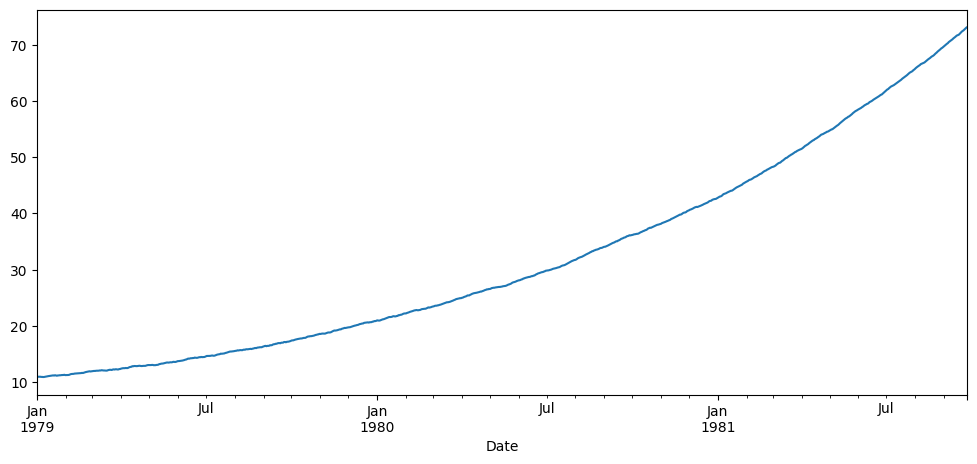

In [ ]:
df['Value'].plot(figsize = (12, 5)).autoscale(axis = 'x', tight = True)

In [ ]:
from statsmodels.tsa.seasonal import STL

In [ ]:
ts_stl = STL(df["Value"], robust = True)
decomp_stl = ts_stl.fit()

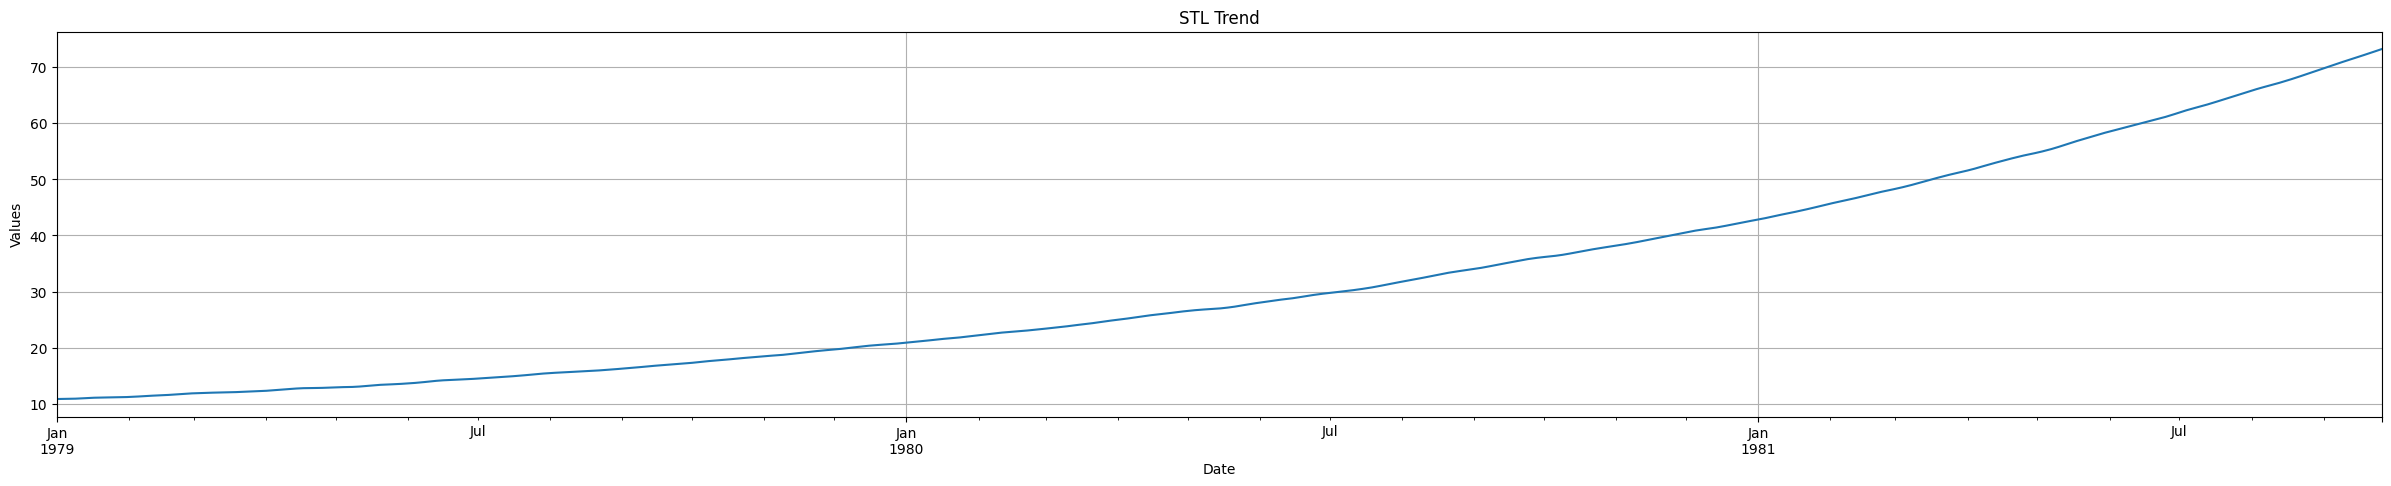

In [ ]:
decomp_stl.trend.plot(figsize = (30,5), grid = True, ylabel = 'Values', title = 'STL Trend')
plt.show()

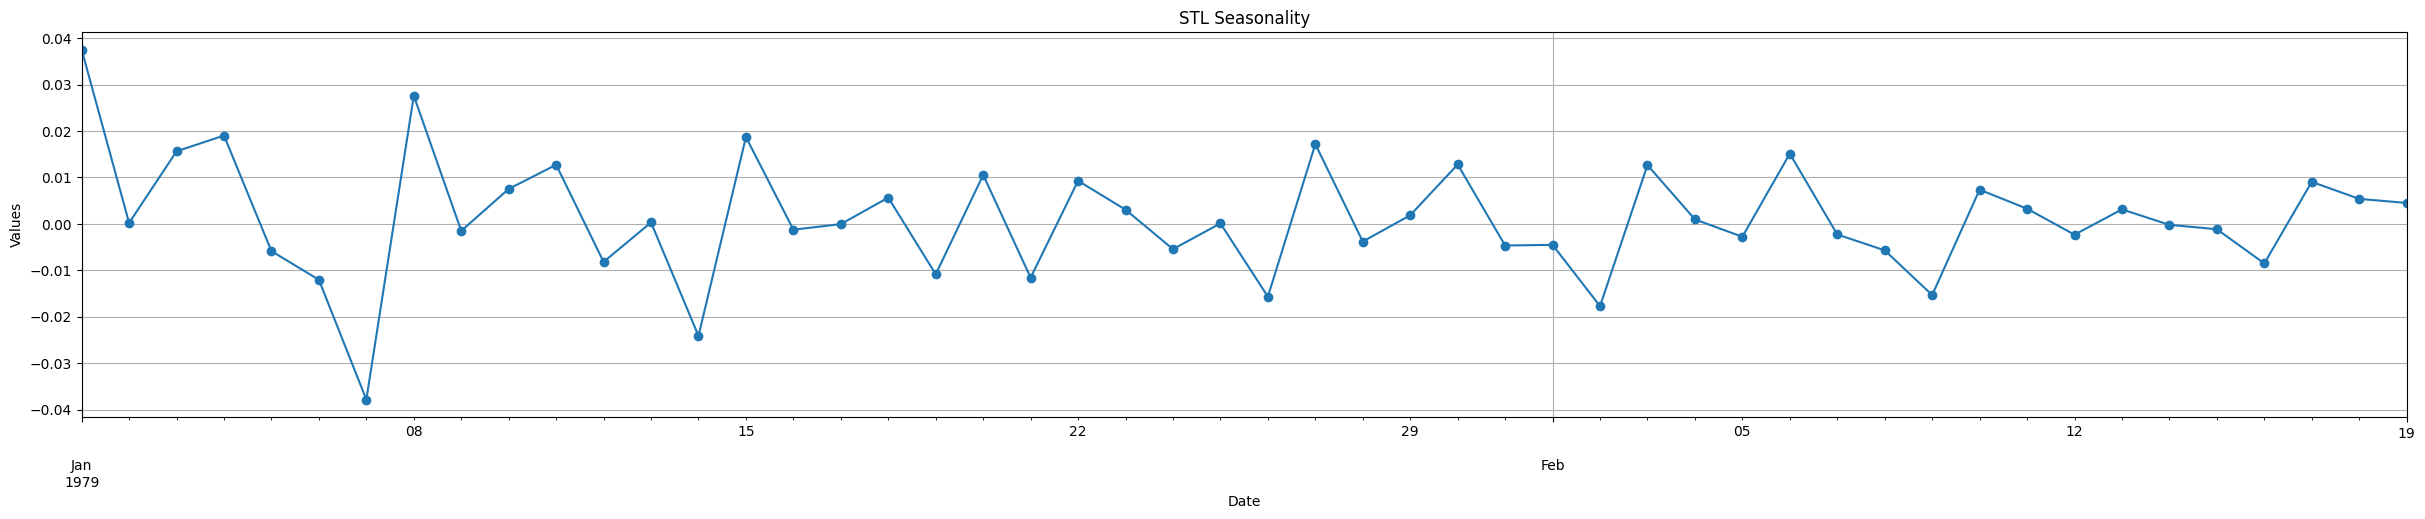

In [ ]:
decomp_stl.seasonal[:50].plot(figsize = (30,5), grid = True, ylabel = 'Values', title = 'STL Seasonality', marker = 'o')
plt.show()

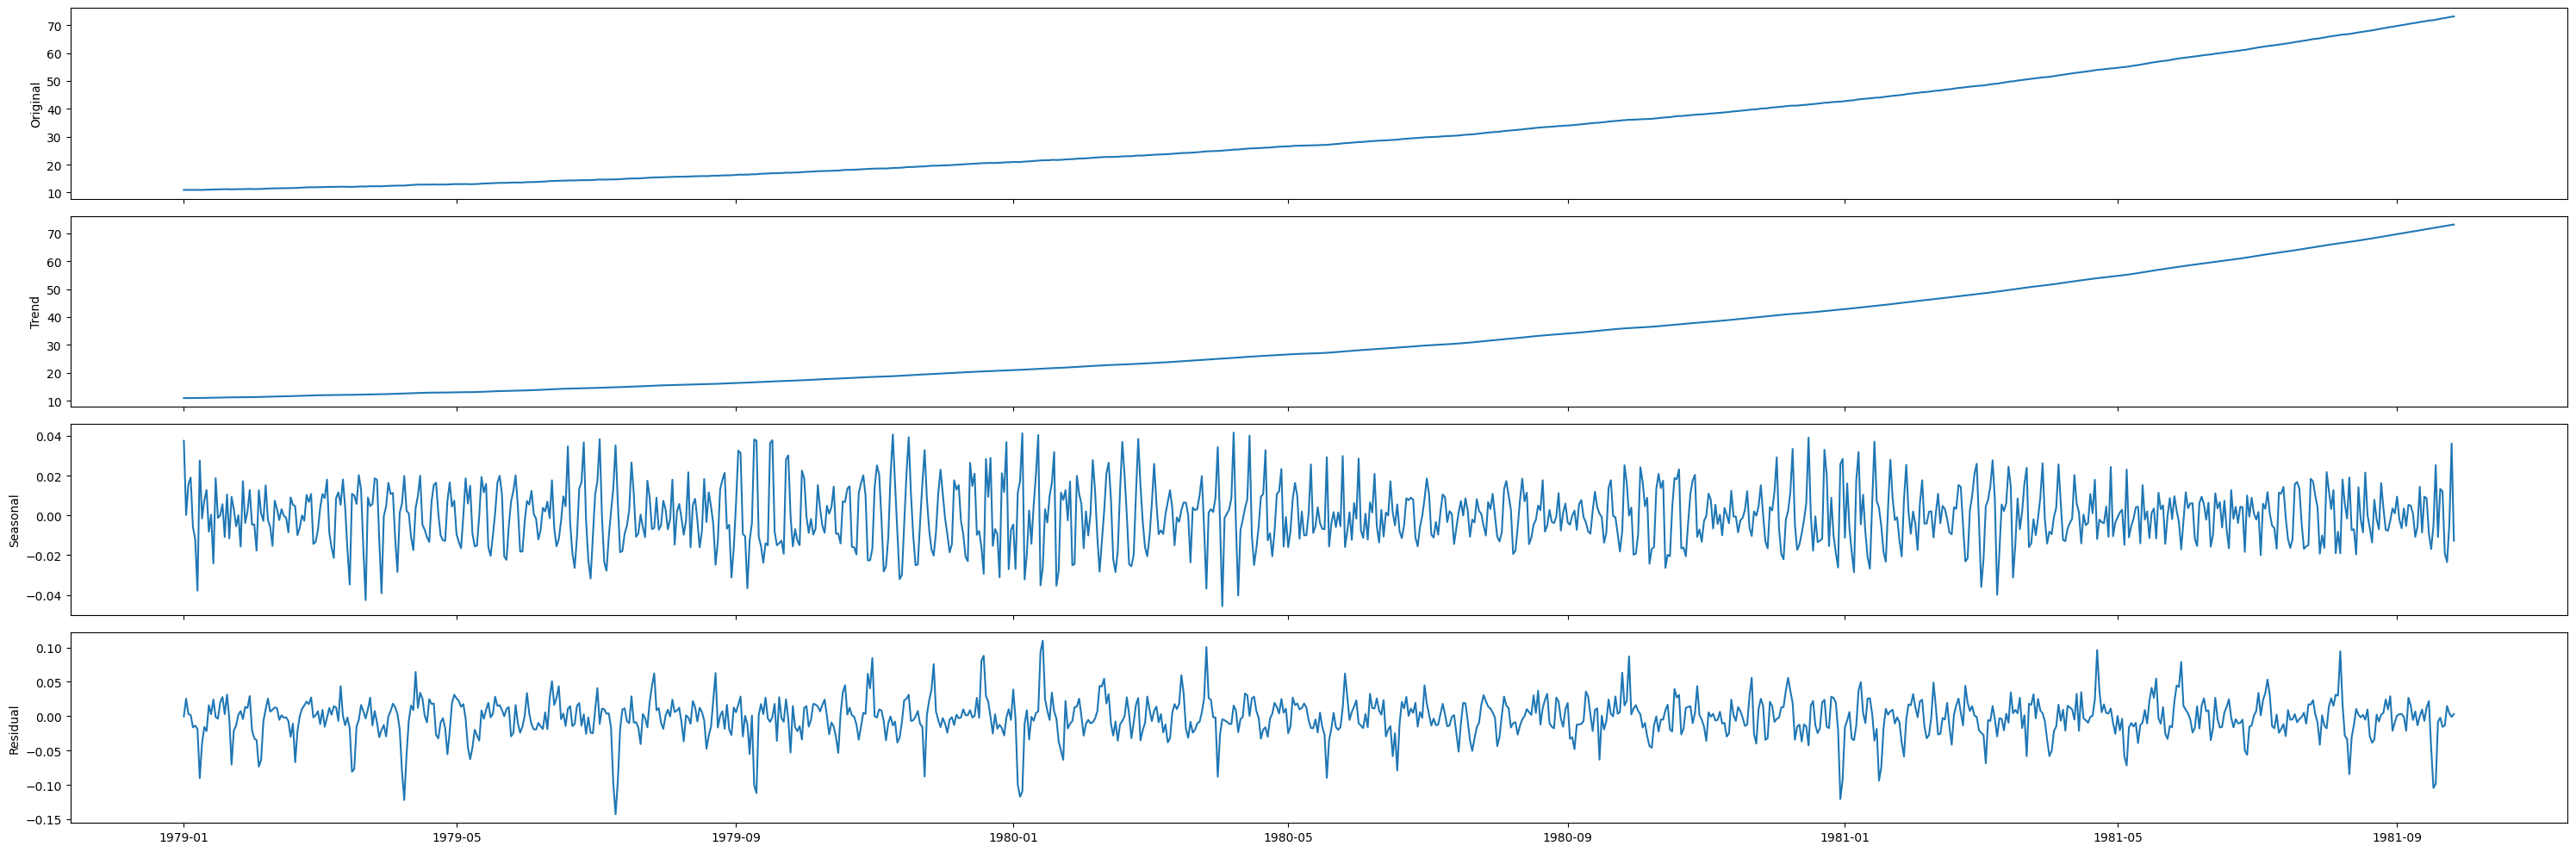

In [ ]:
# prompt: Please generate a residue graph of decomp_stl

fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(30, 10))

# Plot the original time series
axes[0].plot(df['Value'])
axes[0].set_ylabel('Original')

# Plot the trend component
axes[1].plot(decomp_stl.trend)
axes[1].set_ylabel('Trend')

# Plot the seasonal component
axes[2].plot(decomp_stl.seasonal)
axes[2].set_ylabel('Seasonal')

# Plot the residual component
axes[3].plot(decomp_stl.resid)
axes[3].set_ylabel('Residual')

plt.tight_layout()
plt.show()


In [ ]:
from scipy.signal import periodogram

### IF Big drop, no Seasonality

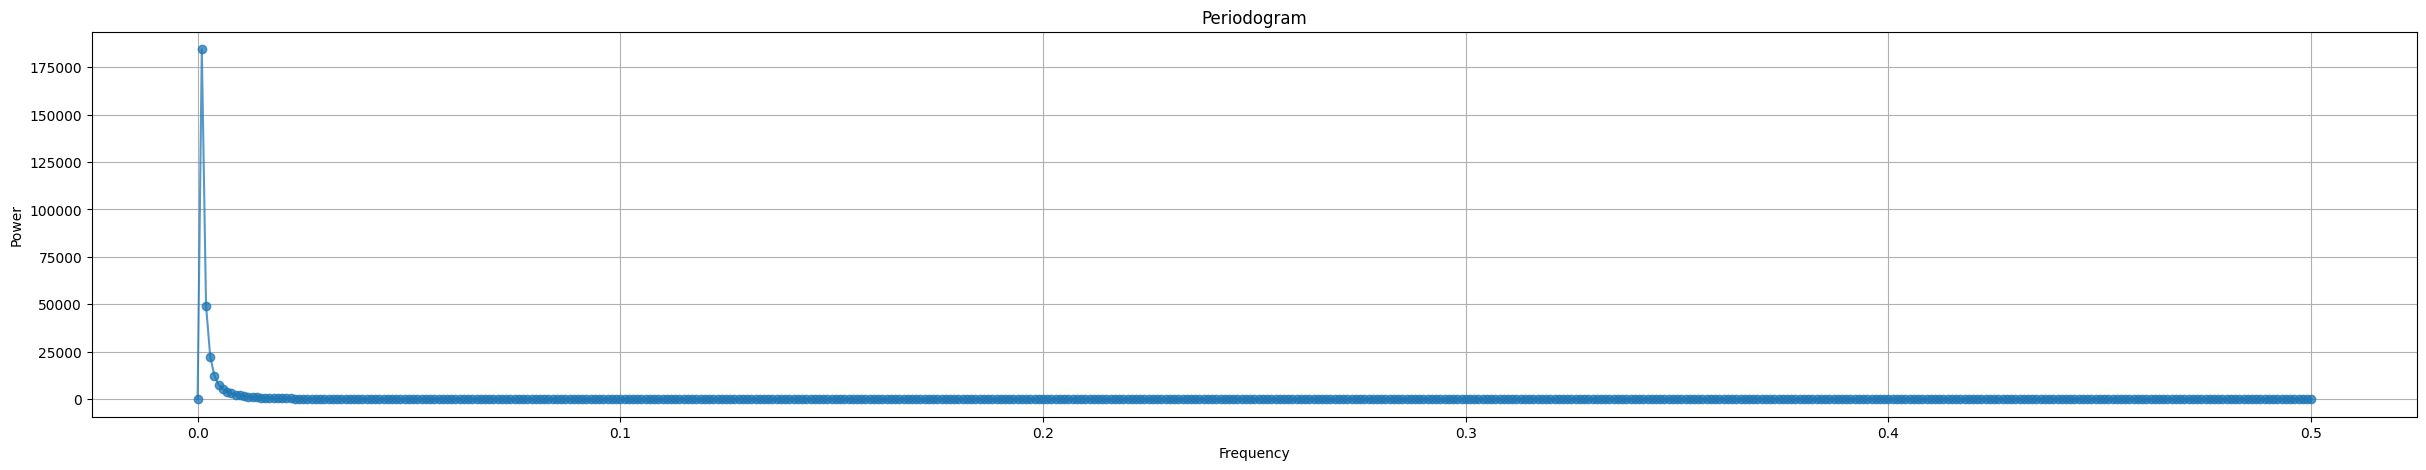

In [ ]:
frequencies, power = periodogram(df['Value'])

plt.figure(figsize=(30, 5))
plt.plot(frequencies, power, marker='o', linestyle='-', alpha = 0.75)
plt.title("Periodogram")
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.grid(True)
plt.show()


In [ ]:
from statsmodels.graphics.tsaplots import month_plot

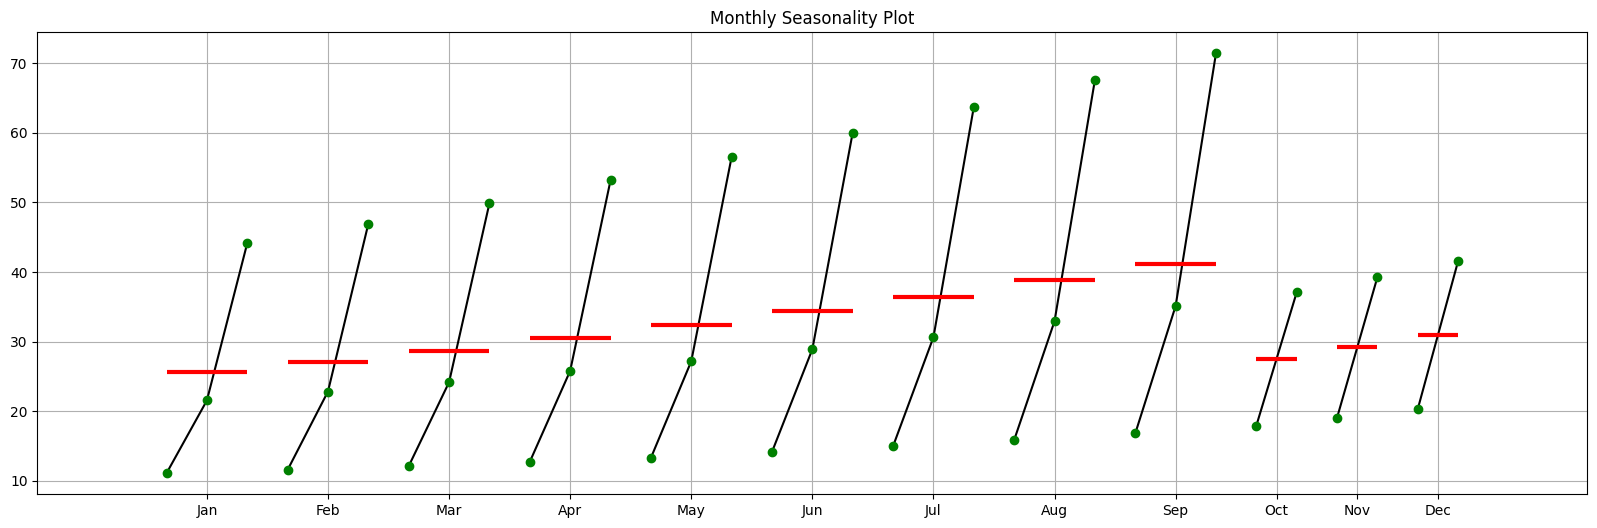

In [ ]:
df_monthly = df['Value'].resample('MS').mean()

fig, ax = plt.subplots(figsize=(20, 6))
month_plot(df_monthly, ax = ax)
plt.title("Monthly Seasonality Plot")
plt.grid()

for line in ax.get_lines():

  line.set_marker('o')
  line.set_markerfacecolor('green')
  line.set_markeredgecolor('green')

plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import quarter_plot

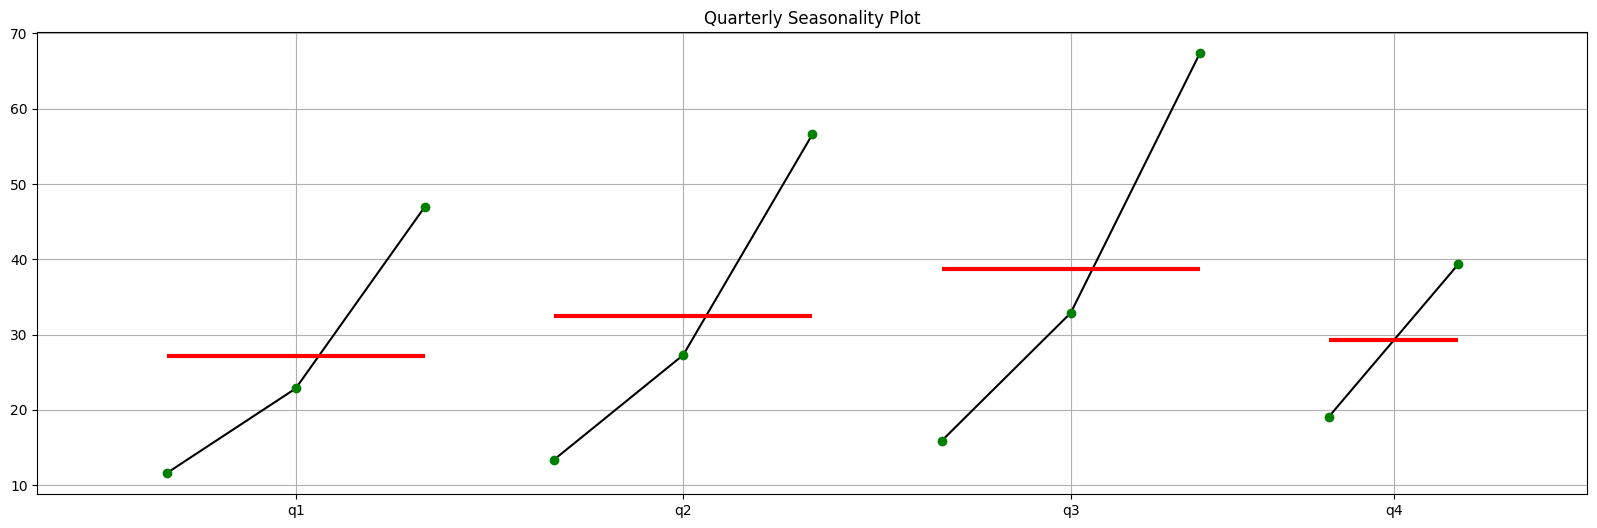

In [ ]:
df_quarter = df['Value'].resample('QE').mean()

fig, ax = plt.subplots(figsize=(20, 6))
quarter_plot(df_quarter, ax = ax)
plt.title("Quarterly Seasonality Plot")
plt.grid()

for line in ax.get_lines():

  line.set_marker('o')
  line.set_markerfacecolor('green')
  line.set_markeredgecolor('green')

plt.show()


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
forecast_horizon = 21
train_data = df.iloc[:-forecast_horizon]
test_data = df.iloc[-forecast_horizon:]

train_data = train_data.asfreq('D')
test_data = test_data.asfreq('D')

In [ ]:
des_model = ExponentialSmoothing(train_data['Value'], trend = 'mul', seasonal=None).fit()

In [ ]:
des_pred = des_model.forecast(forecast_horizon)
des_pred

,0
1981-09-06,70.404577
1981-09-07,70.543234
1981-09-08,70.682164
1981-09-09,70.821368
1981-09-10,70.960845
1981-09-11,71.100598
1981-09-12,71.240626
1981-09-13,71.380930
1981-09-14,71.521510
1981-09-15,71.662366


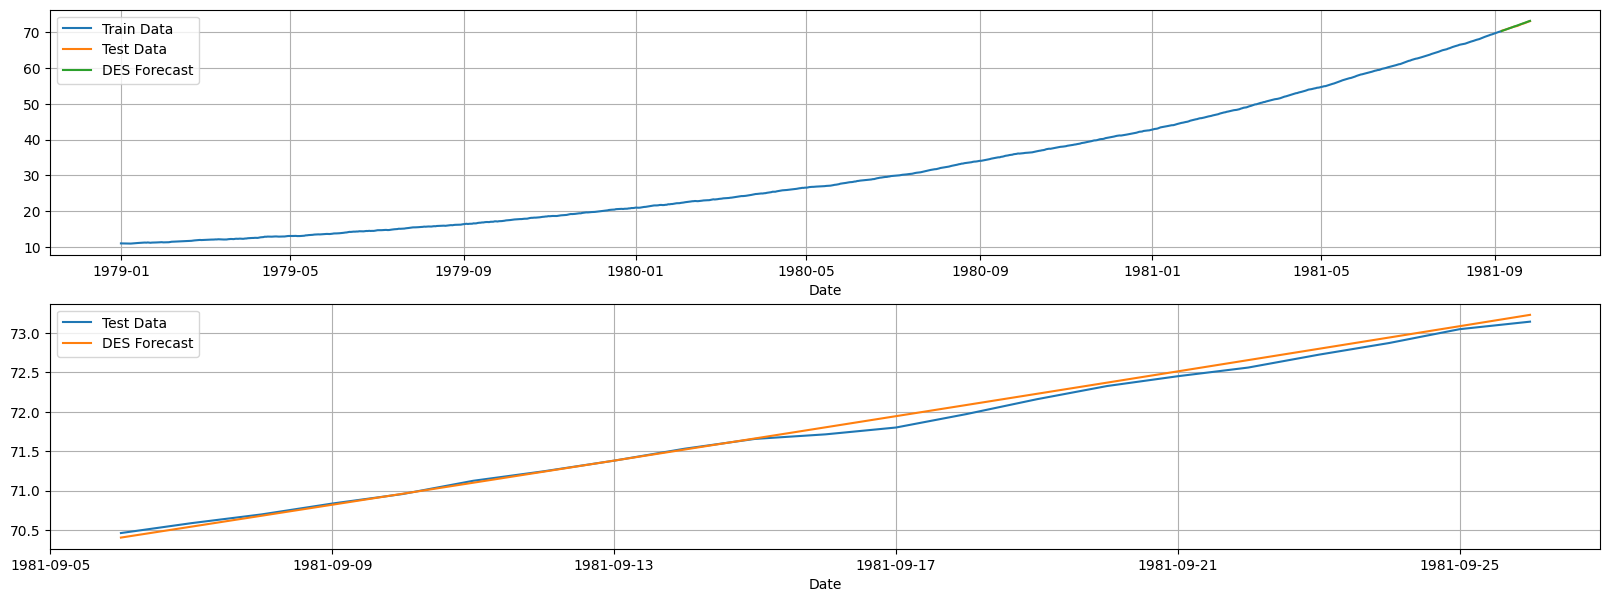

In [ ]:
plt.figure(figsize = (20, 7))

plt.subplot(2, 1, 1)
plt.plot(train_data.index, train_data['Value'], label = 'Train Data')
plt.plot(test_data.index, test_data['Value'], label = 'Test Data')
plt.plot(des_pred.index, des_pred, label = 'DES Forecast')
plt.legend()
plt.grid()
plt.xlabel('Date')

plt.subplot(2, 1, 2)
plt.plot(test_data.index, test_data['Value'], label = 'Test Data')
plt.plot(des_pred.index, des_pred, label = 'DES Forecast')
plt.legend()
plt.grid()
plt.xlabel('Date')
plt.show()


In [ ]:
# Question #2

forecast_value_on_14th_day = des_pred[13]
print(f"The forecast value on the 14th day against the test data is: {forecast_value_on_14th_day}")


The forecast value on the 14th day against the test data is: 72.22857312768897


In [ ]:
df = df.asfreq('D')

des_model = ExponentialSmoothing(df['Value'], trend = 'mul').fit()

In [ ]:
des_pred = des_model.forecast(forecast_horizon)
des_pred

,0
1981-09-27,73.287974
1981-09-28,73.431974
1981-09-29,73.576257
1981-09-30,73.720824
1981-10-01,73.865674
1981-10-02,74.010809
1981-10-03,74.156230
1981-10-04,74.301936
1981-10-05,74.447928
1981-10-06,74.594207


Text(0.5, 0, 'Date')

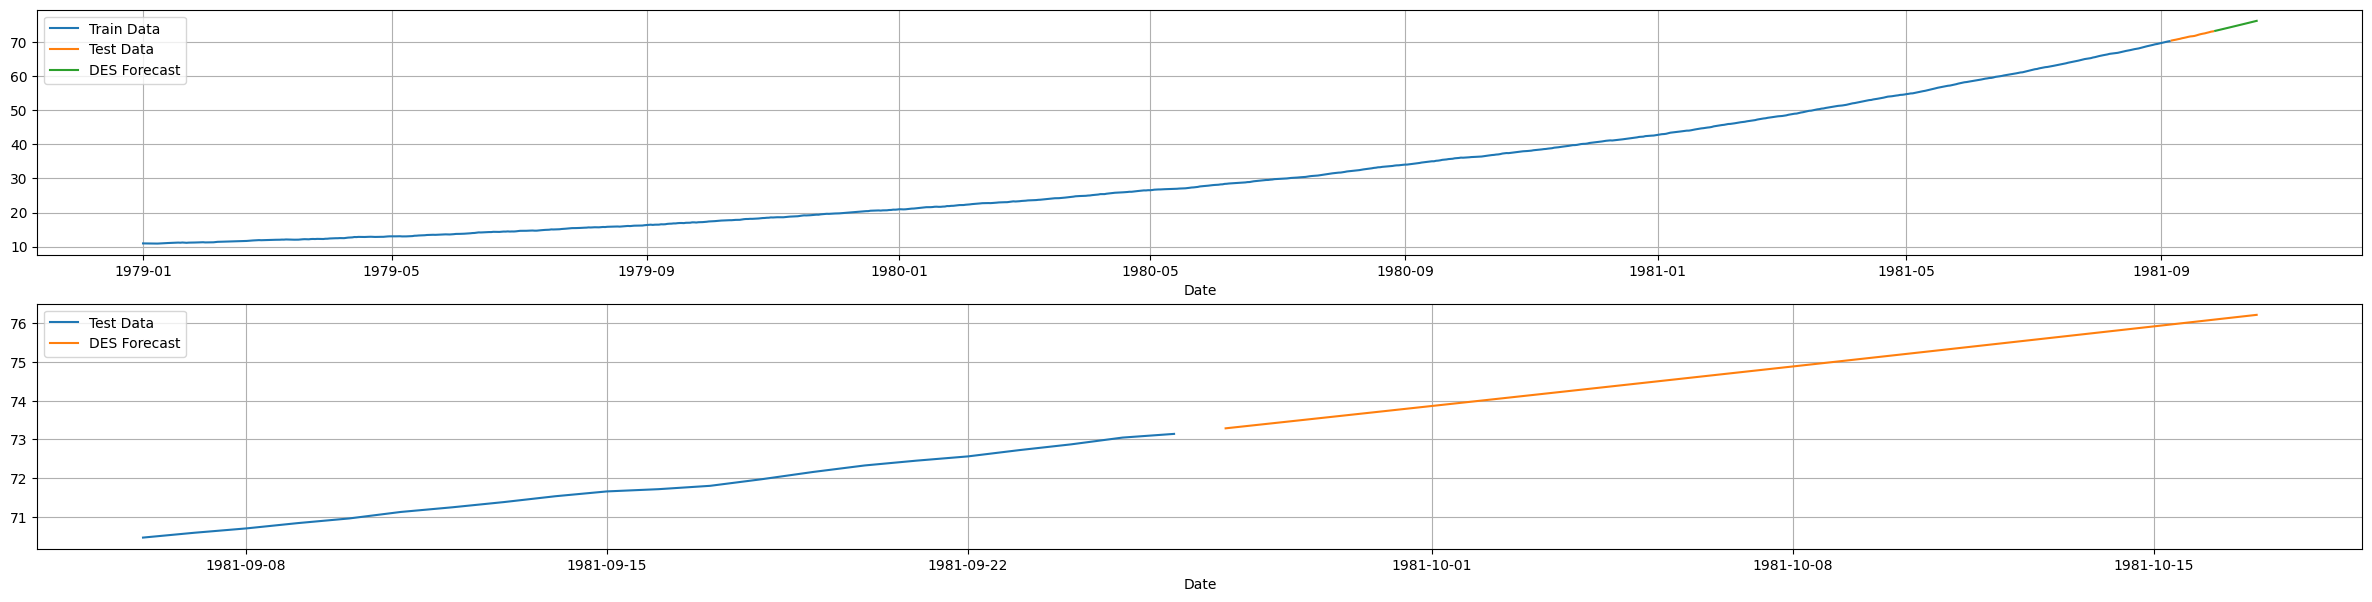

In [ ]:
plt.figure(figsize = (30, 7))

plt.subplot(2, 1, 1)
plt.plot(train_data.index, train_data['Value'], label = 'Train Data')
plt.plot(test_data.index, test_data['Value'], label = 'Test Data')
plt.plot(des_pred.index, des_pred, label = 'DES Forecast')
plt.legend()
plt.grid()
plt.xlabel('Date')

plt.subplot(2, 1, 2)
plt.plot(test_data.index, test_data['Value'], label = 'Test Data')
plt.plot(des_pred.index, des_pred, label = 'DES Forecast')
plt.legend()
plt.grid()
plt.xlabel('Date')


In [ ]:
#Question #3
forecast_value_on_21st_day = des_pred[20]
print(f"The forecast value on the 21st day beyond the given data is: {forecast_value_on_21st_day}")


The forecast value on the 21st day beyond the given data is: 76.22237260225604


In [ ]:
train_data = df.iloc[:-forecast_horizon]
test_data = df.iloc[-forecast_horizon:]

train_data = train_data.asfreq('D')
test_data = test_data.asfreq('D')

In [ ]:
tes_model = ExponentialSmoothing(train_data['Value'], trend = 'additive', seasonal = 'additive', seasonal_periods = 12).fit()

# Lagplot
pag dikit ang data, may seasonality, kita pati trend

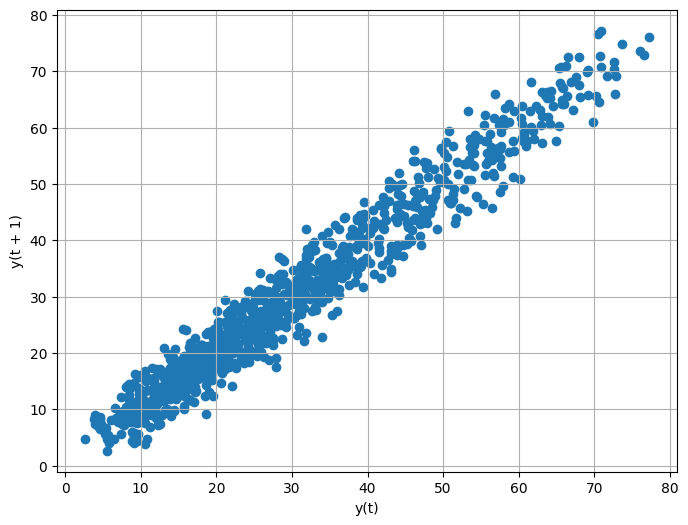

In [ ]:
from pandas.plotting import lag_plot

plt.figure(figsize=(8, 6))  # Set width and height in inches
lag_plot(df['Value'])
plt.grid(True)  # Add grid to the plot
plt.show()

In summary:

# ACF (Autocorrelation Function) — "Total Relationship"

Tells you how much today is related to the past.
At lag 1: "Is today like yesterday?"
At lag 2: "Is today like two days ago?" (including the influence from yesterday)
It includes both direct and indirect relationships.

-------

# PACF (Partial Autocorrelation Function) — "Direct Relationship"
Tells you how much today is related to the past, after removing the middle steps.
At lag 2: "Is today directly like two days ago, ignoring yesterday?"
It shows only the pure/direct connection between points that are a few steps apart.

# ACF Plots
test for trend and seasonality

In [ ]:
# Import the models we'll be using in this section

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

if wala sa blue shade ay walang seasonality ++ if halata na walang wave

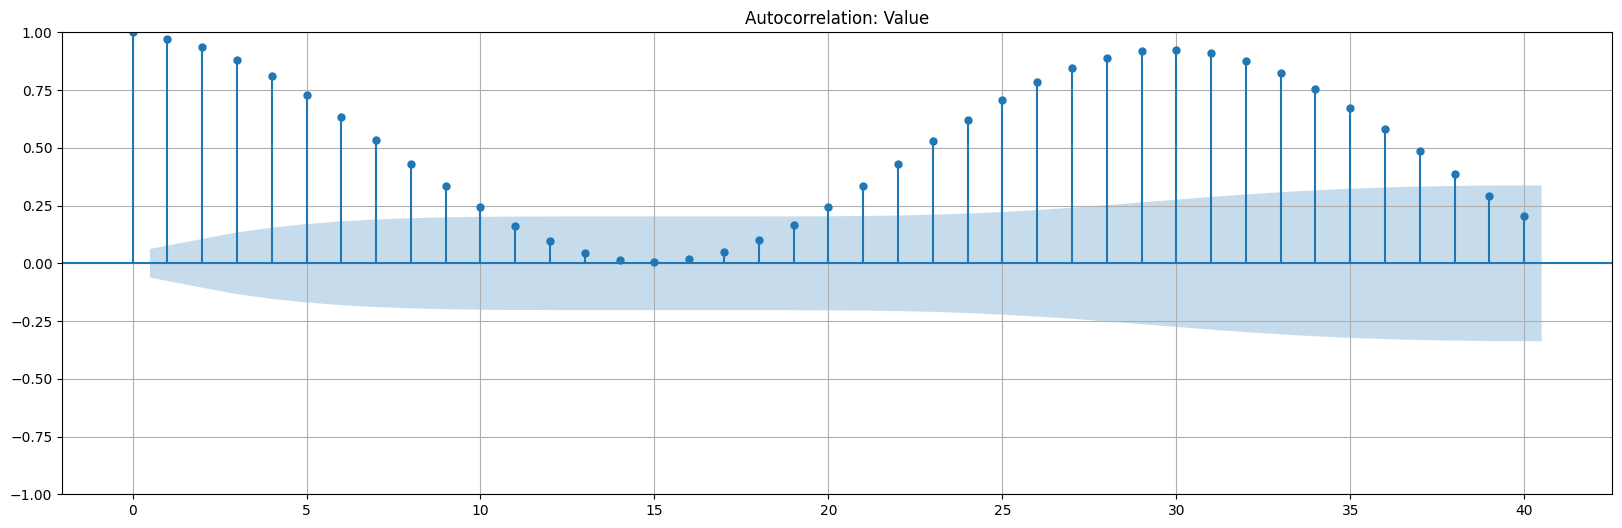

In [ ]:
# Now let's plot the autocorrelation at different lags
lags = 40
fig, ax = plt.subplots(figsize=(20, 6))  # Create fig and ax explicitly
plot_acf(df['Value'], lags = lags, title='Autocorrelation: Value', ax=ax)
ax.grid(True)  # Optional: ensures grid is shown
plt.show()

# PACF Test
seasonality test, if sharp drop no seasonality

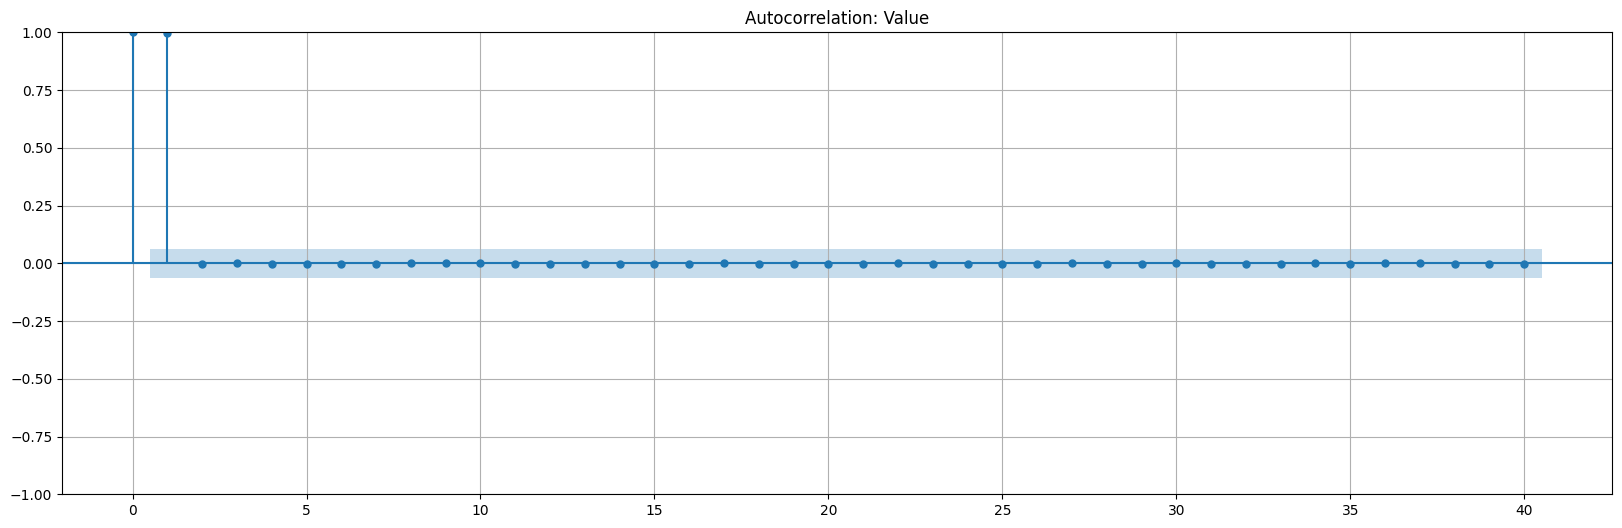

In [ ]:
# Now let's plot the autocorrelation at different lags
lags = 40
fig, ax = plt.subplots(figsize=(20, 6))  # Create fig and ax explicitly
plot_pacf(df['Value'], lags = lags, title='Autocorrelation: Value', ax=ax)
ax.grid(True)  # Optional: ensures grid is shown
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqg0s6x06/khhf30to.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqg0s6x06/p2q4j_9b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84845', 'data', 'file=/tmp/tmpqg0s6x06/khhf30to.json', 'init=/tmp/tmpqg0s6x06/p2q4j_9b.json', 'output', 'file=/tmp/tmpqg0s6x06/prophet_modelns_5jewa/prophet_model-20250407070459.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:05:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


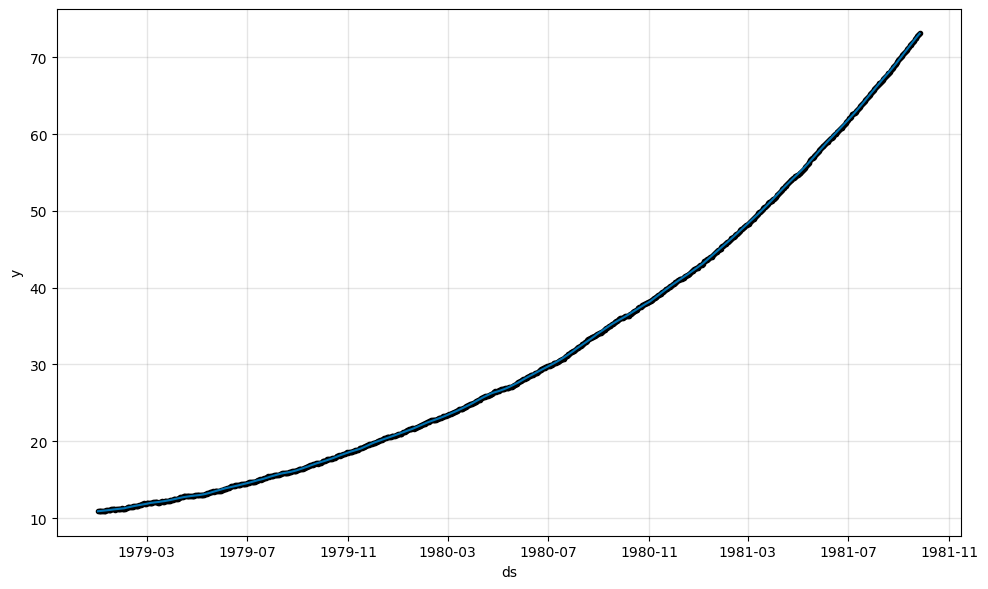

In [ ]:
from prophet import Prophet

model = Prophet()
df1 = df.reset_index()  # Reset the index to make 'Date' a regular column
df1 = df1.rename(columns={'Date': 'ds', 'Value': 'y'})  # Rename columns
model.fit(df1)
forecast = model.predict(df1)

#display prophet output
fig = model.plot(forecast)


In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
import numpy as np

def analyze_time_series(df, date_col, value_col, freq='M'):
    # Ensure datetime index
    ts = df1[[date_col, value_col]].copy()
    ts[date_col] = pd.to_datetime(ts[date_col])
    ts.set_index(date_col, inplace=True)
    ts = ts.asfreq(freq)  # e.g. 'M' for monthly, 'D' for daily

    # Infer seasonal period if possible (e.g., 12 for monthly)
    period = {
        'D': 7,     # Weekly pattern
        'M': 12,    # Yearly pattern
        'Q': 4,     # Four quarters in a year
        'H': 24,    # Daily pattern for hourly data
    }.get(freq, 12)

    stl = STL(ts[value_col], period=period, robust=True)
    res = stl.fit()

    trend_strength = 1 - np.var(res.resid) / np.var(res.resid + res.trend)
    seasonality_strength = 1 - np.var(res.resid) / np.var(res.resid + res.seasonal)

    result = []
    if trend_strength > 0.3:
        result.append("trend")
    if seasonality_strength > 0.3:
        result.append(f"seasonality at every {period} periods")

    if result:
        return f"There is {' and '.join(result)}."
    else:
        return "No strong trend or seasonality detected."

# Example usage
print(analyze_time_series(df1, 'ds', 'y', freq='M'))


There is trend and seasonality at every 12 periods.


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

def detect_model_type(ts, period):
    additive = seasonal_decompose(ts, model='additive', period=period)
    multiplicative = seasonal_decompose(ts, model='multiplicative', period=period)

    additive_error = np.var(additive.resid.dropna())
    multiplicative_error = np.var(multiplicative.resid.dropna())

    if additive_error < multiplicative_error:
        return 'additive'
    else:
        return 'multiplicative'

def analyze_series_model_type(df, date_col, value_col, freq='M'):
    ts = df[[date_col, value_col]].copy()
    ts[date_col] = pd.to_datetime(ts[date_col])
    ts.set_index(date_col, inplace=True)
    ts = ts.asfreq(freq)

    period = {
        'D': 7, 'M': 12, 'Q': 4, 'H': 24,
    }.get(freq, 12)

    # Detect model type
    try:
        model_type = detect_model_type(ts[value_col], period)
    except:
        model_type = 'additive'  # fallback

    # STL only supports additive, so decompose anyway
    stl = STL(ts[value_col], period=period, robust=True)
    res = stl.fit()
    trend_strength = 1 - np.var(res.resid) / np.var(res.resid + res.trend)
    seasonality_strength = 1 - np.var(res.resid) / np.var(res.resid + res.seasonal)

    result = []
    if trend_strength > 0.3:
        result.append("trend")
    if seasonality_strength > 0.3:
        result.append(f"seasonality at every {period} periods")

    if result:
        return f"There is {' and '.join(result)} ({model_type} model)."
    else:
        return f"No strong trend or seasonality detected ({model_type} model)."
print(analyze_series_model_type(df1, 'ds', 'y', freq='M'))

There is trend and seasonality at every 12 periods (multiplicative model).
